# Workflow Example with RADCLIM Input Convertor

In this example we illustrate a typical workflow to work with the RADCLIM data.

## 0. Import packages

We start by importing the necessary packages and functions.

In [4]:
import valenspy as vp
import xarray as xr

## 1. Convert the data

Next, we load in the RADCLIM data while automatically converting it to a CF-format. Because the RADCLIM dataset contains hourly data, the files are saved in a daily format. To specify which files you want to load, you can use the `path_identifiers` argument from the `load_data` function. In this example, we load in the data which contains '2021092' in the name, so all data from 2021/09/20 to 2021/09/29 (10 days).

In [5]:
# Load in the InputManager and specify the machine you are working on
manager = vp.InputManager(machine='hortense')

# Load in the RADCLIM data for the specified path_identifiers and save to ds variable
ds = manager.load_data("RADCLIM", ["pr"], path_identifiers=["2021092"])

# Print out the xarray DataSet
ds

File paths found:
/dodrio/scratch/projects/2022_200/project_output/RMIB-UGent/vsc45263_wout/data/RADCLIM/2021/RADCLIM_precipitation_20210929_hourly.nc
/dodrio/scratch/projects/2022_200/project_output/RMIB-UGent/vsc45263_wout/data/RADCLIM/2021/RADCLIM_precipitation_20210926_hourly.nc
/dodrio/scratch/projects/2022_200/project_output/RMIB-UGent/vsc45263_wout/data/RADCLIM/2021/RADCLIM_precipitation_20210921_hourly.nc
/dodrio/scratch/projects/2022_200/project_output/RMIB-UGent/vsc45263_wout/data/RADCLIM/2021/RADCLIM_precipitation_20210922_hourly.nc
/dodrio/scratch/projects/2022_200/project_output/RMIB-UGent/vsc45263_wout/data/RADCLIM/2021/RADCLIM_precipitation_20210923_hourly.nc
/dodrio/scratch/projects/2022_200/project_output/RMIB-UGent/vsc45263_wout/data/RADCLIM/2021/RADCLIM_precipitation_20210925_hourly.nc
/dodrio/scratch/projects/2022_200/project_output/RMIB-UGent/vsc45263_wout/data/RADCLIM/2021/RADCLIM_precipitation_20210928_hourly.nc
/dodrio/scratch/projects/2022_200/project_output/RM

<xarray.Dataset> Size: 4GB
Dimensions:     (lat: 700, lon: 700, time: 240, nv: 4)
Coordinates:
    lat         (lat, lon) float32 2MB dask.array<chunksize=(700, 700), meta=np.ndarray>
    lon         (lat, lon) float32 2MB dask.array<chunksize=(700, 700), meta=np.ndarray>
    lat_bounds  (time, lat, lon, nv) float32 2GB dask.array<chunksize=(24, 700, 700, 4), meta=np.ndarray>
    lon_bounds  (time, lat, lon, nv) float32 2GB dask.array<chunksize=(24, 700, 700, 4), meta=np.ndarray>
  * time        (time) datetime64[ns] 2kB 2021-09-20 ... 2021-09-29T23:00:00
Dimensions without coordinates: nv
Data variables:
    pr          (time, lat, lon) float32 470MB dask.array<chunksize=(24, 700, 700), meta=np.ndarray>
Attributes:
    title:             Radar Data with Curvilinear Grid
    source:            Generated for demonstration
    Conventions:       CF-1.8
    path_identifiers:  ['2021092']
    history:           
    dataset:           RADCLIM

## 2. Plot the data

Finally we make a quick plot of the data to inspect it. We first calculate the mean over time (the 10 days) and next plot it with the simple xarray plotting function. Note how the circular areas that the radars cover are visible on the plot.

[########################################] | 100% Completed | 9.40 ss


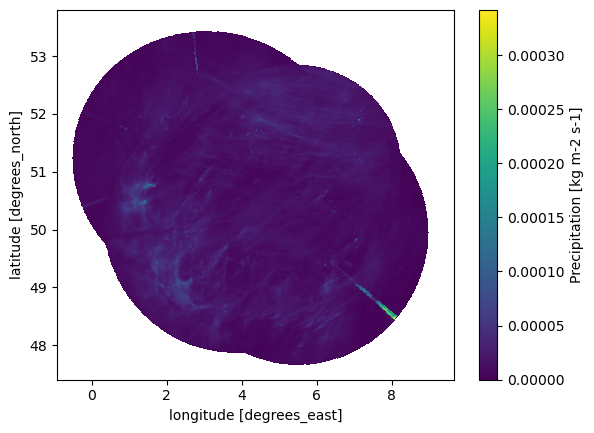

In [7]:
from dask.diagnostics import ProgressBar

with ProgressBar():
    ds_mean = ds.mean("time").compute()

ds_mean.pr.plot()